In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
d=pd.read_csv('data.csv')
print(d.head())

  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
0        0        0        0        0  ...   209322  209340  209358  209362   
1        0        0        0        0  ...   334391  334408  334408  334427   
2        0        0        0        0  ...   271441  271448  271463  271469   
3        0        0        0        0  ...    47866   47875   47875   47875   
4        0        0        0        0  ...   105255  105277  105277  105277   

   3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0  209369  209390  209406  2

In [26]:
d.shape

(289, 1147)

In [27]:
df=d.drop(['Lat','Long'],axis=1,inplace=True)
print(d.head())

  Province/State Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
0            NaN    Afghanistan        0        0        0        0        0   
1            NaN        Albania        0        0        0        0        0   
2            NaN        Algeria        0        0        0        0        0   
3            NaN        Andorra        0        0        0        0        0   
4            NaN         Angola        0        0        0        0        0   

   1/27/20  1/28/20  1/29/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  \
0        0        0        0  ...   209322  209340  209358  209362  209369   
1        0        0        0  ...   334391  334408  334408  334427  334427   
2        0        0        0  ...   271441  271448  271463  271469  271469   
3        0        0        0  ...    47866   47875   47875   47875   47875   
4        0        0        0  ...   105255  105277  105277  105277  105277   

   3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0  209

In [28]:
carona_d_aggregate=d.groupby('Country/Region').sum()
print(carona_d_aggregate.head())

               Province/State  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
Country/Region                                                               
Afghanistan                 0        0        0        0        0        0   
Albania                     0        0        0        0        0        0   
Algeria                     0        0        0        0        0        0   
Andorra                     0        0        0        0        0        0   
Angola                      0        0        0        0        0        0   

                1/27/20  1/28/20  1/29/20  1/30/20  ...  2/28/23  3/1/23  \
Country/Region                                      ...                    
Afghanistan           0        0        0        0  ...   209322  209340   
Albania               0        0        0        0  ...   334391  334408   
Algeria               0        0        0        0  ...   271441  271448   
Andorra               0        0        0        0  ...    47866   47875 

In [29]:
carona_d_aggregate.shape

(201, 1144)

In [30]:
carona_d_aggregate.loc['India']


Province/State           0
1/22/20                  0
1/23/20                  0
1/24/20                  0
1/25/20                  0
                    ...   
3/5/23            44689327
3/6/23            44689593
3/7/23            44689919
3/8/23            44690298
3/9/23            44690738
Name: India, Length: 1144, dtype: object

<Axes: >

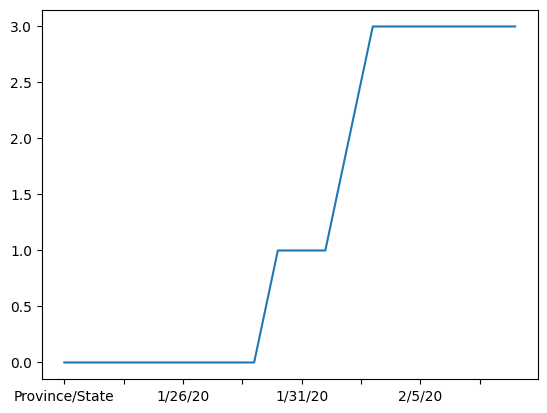

In [ ]:
carona_d_aggregate.loc['India'][:20].plot()

<Axes: >

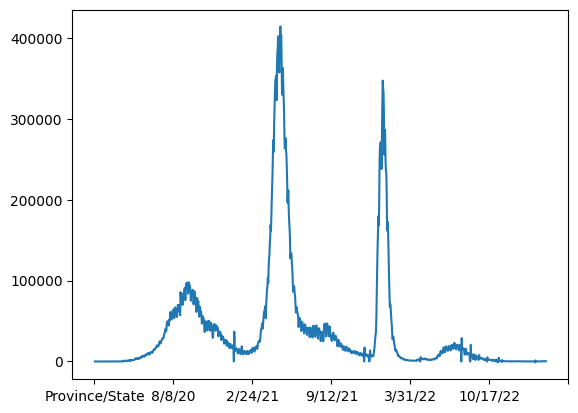

In [ ]:
carona_d_aggregate.loc['India'].diff().plot()

In [ ]:
carona_d_aggregate.loc['India'].diff().max()


np.int64(414188)

In [ ]:
carona_d_aggregate.loc['Albania'].diff().max()


np.int64(4789)

In [ ]:
c=list(carona_d_aggregate.index)
max_inf_rates=[]
carona_d_aggregate = carona_d_aggregate.apply(pd.to_numeric, errors='coerce')

for c in c:
    max_inf_rates.append(carona_d_aggregate.loc[c].diff().max())
carona_d_aggregate['max_inf_rates']=max_inf_rates
print(carona_d_aggregate)

                      Province/State  1/22/20  1/23/20  1/24/20  1/25/20  \
Country/Region                                                             
Afghanistan                      0.0        0        0        0        0   
Albania                          0.0        0        0        0        0   
Algeria                          0.0        0        0        0        0   
Andorra                          0.0        0        0        0        0   
Angola                           0.0        0        0        0        0   
...                              ...      ...      ...      ...      ...   
West Bank and Gaza               0.0        0        0        0        0   
Winter Olympics 2022             0.0        0        0        0        0   
Yemen                            0.0        0        0        0        0   
Zambia                           0.0        0        0        0        0   
Zimbabwe                         0.0        0        0        0        0   

           

In [ ]:
carona=pd.DataFrame(carona_d_aggregate['max_inf_rates'])
print(carona)

                      max_inf_rates
Country/Region                     
Afghanistan                  3243.0
Albania                      4789.0
Algeria                      2521.0
Andorra                      2313.0
Angola                       5035.0
...                             ...
West Bank and Gaza          30356.0
Winter Olympics 2022           72.0
Yemen                         287.0
Zambia                       5555.0
Zimbabwe                     9185.0

[201 rows x 1 columns]


In [ ]:
import pandas as pd
happiness_report=pd.read_csv("WHR2023.csv")
print(happiness_report)

         Country name  Ladder score  Standard error of ladder score  \
0             Finland         7.804                           0.036   
1             Denmark         7.586                           0.041   
2             Iceland         7.530                           0.049   
3              Israel         7.473                           0.032   
4         Netherlands         7.403                           0.029   
..                ...           ...                             ...   
132  Congo (Kinshasa)         3.207                           0.095   
133          Zimbabwe         3.204                           0.061   
134      Sierra Leone         3.138                           0.082   
135           Lebanon         2.392                           0.044   
136       Afghanistan         1.859                           0.033   

     upperwhisker  lowerwhisker  Logged GDP per capita  Social support  \
0           7.875         7.733                 10.792           0.969   

In [ ]:
useless=['Ladder score','Standard error of ladder score']
WHR2023_cleaned=happiness_report.drop(useless,axis=1)
print(WHR2023_cleaned)

         Country name  upperwhisker  lowerwhisker  Logged GDP per capita  \
0             Finland         7.875         7.733                 10.792   
1             Denmark         7.667         7.506                 10.962   
2             Iceland         7.625         7.434                 10.896   
3              Israel         7.535         7.411                 10.639   
4         Netherlands         7.460         7.346                 10.942   
..                ...           ...           ...                    ...   
132  Congo (Kinshasa)         3.394         3.020                  7.007   
133          Zimbabwe         3.323         3.084                  7.641   
134      Sierra Leone         3.299         2.976                  7.394   
135           Lebanon         2.479         2.305                  9.478   
136       Afghanistan         1.923         1.795                  7.324   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0        

In [ ]:
happiness_report.set_index('Country name', inplace=True)
print(happiness_report.head())


              Ladder score  Standard error of ladder score  upperwhisker  \
Country name                                                               
Finland              7.804                           0.036         7.875   
Denmark              7.586                           0.041         7.667   
Iceland              7.530                           0.049         7.625   
Israel               7.473                           0.032         7.535   
Netherlands          7.403                           0.029         7.460   

              lowerwhisker  Logged GDP per capita  Social support  \
Country name                                                        
Finland              7.733                 10.792           0.969   
Denmark              7.506                 10.962           0.954   
Iceland              7.434                 10.896           0.983   
Israel               7.411                 10.639           0.943   
Netherlands          7.346                 10.942    

In [36]:
carona_d_aggregate.shape


(201, 1144)

In [37]:
happiness_report.shape

(137, 18)

In [38]:
data=happiness_report.join(carona_d_aggregate,how='inner')
print(data)

                  Ladder score  Standard error of ladder score  upperwhisker  \
Finland                  7.804                           0.036         7.875   
Denmark                  7.586                           0.041         7.667   
Iceland                  7.530                           0.049         7.625   
Israel                   7.473                           0.032         7.535   
Netherlands              7.403                           0.029         7.460   
...                        ...                             ...           ...   
Congo (Kinshasa)         3.207                           0.095         3.394   
Zimbabwe                 3.204                           0.061         3.323   
Sierra Leone             3.138                           0.082         3.299   
Lebanon                  2.392                           0.044         2.479   
Afghanistan              1.859                           0.033         1.923   

                  lowerwhisker  Logged 

In [43]:
data

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,...,1462169,1462169,1462976,1462976,1462976,1462976,1462976,1462976,1462976,1463644
Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,...,3449989,3450101,3450223,3450336,3450336,3450336,3450587,3450757,3450897,3451036
Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,...,209093,209093,209093,209093,209093,209093,209093,209137,209137,209137
Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,...,4799274,4799631,4800388,4800904,4801221,4801502,4801502,4801502,4803164,4803824
Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,...,8708982,8709011,8709011,8710897,8710897,8710897,8710897,8712835,8712835,8712835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Congo (Kinshasa),3.207,0.095,3.394,3.020,7.007,0.652,55.375,0.664,0.086,0.834,...,95646,95749,95749,95749,95749,95749,95749,95749,95749,95749
Zimbabwe,3.204,0.061,3.323,3.084,7.641,0.690,54.050,0.654,-0.046,0.766,...,263921,264127,264127,264127,264127,264127,264127,264127,264276,264276
Sierra Leone,3.138,0.082,3.299,2.976,7.394,0.555,54.900,0.660,0.105,0.858,...,7760,7760,7760,7760,7760,7760,7760,7760,7760,7760
Lebanon,2.392,0.044,2.479,2.305,9.478,0.530,66.149,0.474,-0.141,0.891,...,1231840,1232063,1232063,1232301,1232301,1232517,1232517,1232517,1232649,1232828
